In [2]:
#importing training and test set
import pandas as pd
train_csv = pd.read_csv('Google_Stock_Price_Train.csv')
print(train_csv)
test_csv = pd.read_csv('Google_Stock_Price_Test.csv')
print(test_csv)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]
         Date    Open    High     Low   Close     Volume
0    1/3/2017  778.81  789.63  775.80  786.14  1,657,300
1    1/4/2017  788.36  791.34  783.16  786.90  1,073,000
2    1/5/2017  786.08  794.48  785.02  794.02  1,335,200
3    1/6/2017  

In [3]:
import numpy as np
train_csv = np.array(train_csv)
test_csv = np.array(test_csv)
train_input_raw = train_csv[:,1:2]
print(train_input_raw)
test_input_raw = test_csv[:,1:2]
print(test_input_raw)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7]
 [783.33]
 [782.75]]
[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4]
 [807.86]
 [805.0]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_input_raw = sc.fit_transform(train_input_raw)
print(train_input_raw.shape)

(1258, 1)


In [5]:
X_train = []
y_train = []
for i in range(0,len(train_input_raw)-60-1):
  X_timest = []
  for j in range(0,60):
    X_timest.append(train_input_raw[i+j])
  X_train.append(X_timest)
  y_train.append(train_input_raw[i+60][0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)
print(X_train, y_train)

(1197, 60, 1)
(1197,)
[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92493861]
  [0.92106928]
  [0.92438053]
  ...
  [0.96123223]
  [0.95475854]
  [0.95204256]]

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]] [0.08627874 0.08471612 0.07454052 ... 0.95163331 0.95725128 0.93796041]


In [6]:
#design model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=60,return_sequences=True,activation='sigmoid',input_shape=(None,1)))
model.add(Dropout(0.15))

model.add(LSTM(units=80,return_sequences=True,activation='sigmoid'))
model.add(Dropout(0.15))

model.add(LSTM(units=80,return_sequences=True,activation='sigmoid'))
model.add(Dropout(0.15))

model.add(LSTM(units=120,activation='sigmoid'))
model.add(Dropout(0.15))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss = 'mean_squared_error')


In [7]:
model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 10s 141ms/step - loss: 0.1298
Epoch 2/50
38/38 [==============================] - 5s 145ms/step - loss: 0.1094
Epoch 3/50
38/38 [==============================] - 5s 142ms/step - loss: 0.0945
Epoch 4/50
38/38 [==============================] - 5s 142ms/step - loss: 0.0907
Epoch 5/50
38/38 [==============================] - 5s 144ms/step - loss: 0.0852
Epoch 6/50
38/38 [==============================] - 6s 146ms/step - loss: 0.0890
Epoch 7/50
38/38 [==============================] - 5s 144ms/step - loss: 0.0792
Epoch 8/50
38/38 [==============================] - 6s 146ms/step - loss: 0.0835
Epoch 9/50
38/38 [==============================] - 6s 145ms/step - loss: 0.0803
Epoch 10/50
38/38 [==============================] - 5s 144ms/step - loss: 0.0887
Epoch 11/50
38/38 [==============================] - 6s 146ms/step - loss: 0.0747
Epoch 12/50
38/38 [==============================] - 6s 145ms/step - loss: 0.0803
Epoch 13/50
38/38 [=====

In [8]:
test_input_scale = sc.transform(test_input_raw)
test_input_pred = []
for i in range(0,len(test_input_scale),1):
  test_temp = []
  for j in range(1):
    test_temp.append(test_input_scale[i+j])
  test_input_pred.append(test_temp)

test_input_pred = np.array(test_input_pred)
print(test_input_pred.shape)


(20, 1, 1)


In [9]:
print(test_input_pred)
predicted_price = model.predict(test_input_pred)
#print(predicted_price)
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price)

[[[0.92955205]]

 [[0.94731751]]

 [[0.94307612]]

 [[0.96015329]]

 [[0.98087655]]

 [[0.98359253]]

 [[0.97827219]]

 [[0.98225314]]

 [[0.98288563]]

 [[0.98214153]]

 [[0.979779  ]]

 [[0.97849542]]

 [[0.98182528]]

 [[0.98245777]]

 [[1.01045465]]

 [[1.02407173]]

 [[1.03930724]]

 [[1.03354044]]

 [[0.99624228]]

 [[0.9631297 ]]]
[[426.41675]
 [427.17297]
 [426.99252]
 [427.71848]
 [428.59766]
 [428.71274]
 [428.48727]
 [428.65594]
 [428.6828 ]
 [428.65128]
 [428.55115]
 [428.49673]
 [428.63785]
 [428.66464]
 [429.849  ]
 [430.42368]
 [431.06546]
 [430.8227 ]
 [429.24826]
 [427.84485]]


In [10]:
test2 = []
for i in range(0,200):
  temp = []
  for j in range(len(train_input_raw) - 260 + i,len(train_input_raw) - 200 + i):
    temp.append(train_input_raw[j])
  test2.append(temp)
test2 = np.array(test2)
print(test2.shape)
print(test2)

(200, 60, 1)
[[[0.86875884]
  [0.87902746]
  [0.88241313]
  ...
  [0.83302329]
  [0.83200015]
  [0.85075154]]

 [[0.87902746]
  [0.88241313]
  [0.87512092]
  ...
  [0.83200015]
  [0.85075154]
  [0.86081554]]

 [[0.88241313]
  [0.87512092]
  [0.88138998]
  ...
  [0.85075154]
  [0.86081554]
  [0.85084456]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [11]:
pred2 = model.predict(test2)
pred2 = sc.inverse_transform(pred2)
print(pred2)

[[710.03815]
 [711.74066]
 [713.3312 ]
 [714.77234]
 [716.228  ]
 [717.3555 ]
 [718.3592 ]
 [719.2369 ]
 [720.4435 ]
 [721.7865 ]
 [722.7948 ]
 [723.84985]
 [724.61804]
 [725.1025 ]
 [725.69946]
 [726.3339 ]
 [726.90674]
 [727.28186]
 [727.8208 ]
 [728.58093]
 [729.40155]
 [730.3425 ]
 [731.5193 ]
 [732.47516]
 [733.16516]
 [733.0058 ]
 [732.1324 ]
 [731.2301 ]
 [729.9512 ]
 [728.4771 ]
 [726.48364]
 [724.42285]
 [722.4256 ]
 [720.31866]
 [718.3924 ]
 [716.6779 ]
 [715.5481 ]
 [714.9509 ]
 [714.82874]
 [714.74475]
 [714.4652 ]
 [714.0024 ]
 [713.696  ]
 [713.1576 ]
 [712.414  ]
 [711.5863 ]
 [710.9235 ]
 [710.417  ]
 [710.4428 ]
 [710.8572 ]
 [711.4502 ]
 [712.319  ]
 [713.3953 ]
 [714.4581 ]
 [715.345  ]
 [715.96893]
 [716.28564]
 [716.56177]
 [716.81683]
 [716.9443 ]
 [716.8946 ]
 [716.7512 ]
 [716.6543 ]
 [716.47516]
 [716.0442 ]
 [715.1741 ]
 [714.0696 ]
 [712.93835]
 [711.798  ]
 [709.9474 ]
 [707.50696]
 [705.13007]
 [703.1035 ]
 [701.4312 ]
 [700.223  ]
 [699.4541 ]
 [698.7184 ]

[[736.5 ]
 [737.46]
 [742.36]
 [732.01]
 [736.79]
 [734.59]
 [750.1 ]
 [749.25]
 [738.6 ]
 [750.06]
 [738.  ]
 [735.77]
 [745.37]
 [743.97]
 [743.02]
 [738.  ]
 [749.16]
 [754.01]
 [753.98]
 [760.46]
 [769.51]
 [758.  ]
 [755.38]
 [726.3 ]
 [716.1 ]
 [725.42]
 [707.29]
 [708.26]
 [690.7 ]
 [697.63]
 [696.87]
 [690.49]
 [697.7 ]
 [698.38]
 [712.  ]
 [716.75]
 [723.41]
 [717.06]
 [711.93]
 [709.13]
 [715.99]
 [703.67]
 [702.36]
 [701.62]
 [706.53]
 [706.86]
 [720.76]
 [722.87]
 [724.01]
 [731.74]
 [734.53]
 [732.5 ]
 [729.27]
 [724.91]
 [719.84]
 [723.96]
 [722.87]
 [719.47]
 [716.51]
 [716.48]
 [719.  ]
 [714.91]
 [708.65]
 [698.77]
 [698.4 ]
 [699.06]
 [697.45]
 [675.17]
 [671.  ]
 [678.97]
 [683.  ]
 [685.47]
 [692.2 ]
 [696.06]
 [689.98]
 [698.08]
 [699.5 ]
 [708.05]
 [719.12]
 [723.62]
 [721.58]
 [725.73]
 [722.71]
 [729.89]
 [737.33]
 [740.36]
 [741.86]
 [740.67]
 [739.04]
 [738.28]
 [747.04]
 [772.71]
 [761.09]
 [768.69]
 [767.18]
 [772.22]
 [773.78]
 [782.  ]
 [781.1 ]
 [783.75]


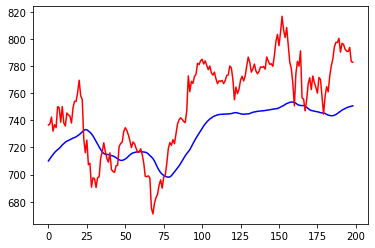

In [12]:
#plot for LSTM
import matplotlib.pyplot as plt

preds = []
actu = sc.inverse_transform(train_input_raw[len(train_input_raw)- 199:])
print(actu)
for i in range(len(pred2)-1):
  preds.append(pred2[i][0])

print(preds)
plt.plot(preds,color='blue')
plt.plot(actu,color='red')
plt.show()